In [1]:
import pandas as pd

from util.performance import plot_moderation_performance, plot_moderation_performanceNoise
from tqdm import tqdm
from kneed import DataGenerator, KneeLocator

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

C:\Users\Jakob\AppData\Local\Temp\ipykernel_4108\464871014.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# load df
names = ['CNN2_BL', 'CNN2_MCD', 'CNN2_BBB', 'CNN2_EN']
label = ['KimCNN-BL', 'KimCNN-MCD', 'KimCNN-BBB', 'KimCNN-EN']
colours = ['b', 'r', 'y', 'g']
dfs_all = []
for name in names:
    dfs = []
    for i in range(5):
        df = pd.read_pickle(f"../pickle/newsGroups/{name}_{i}.pkl")
        dfs.append(df)
        i = i+1
    dfs_all.append(dfs)

Effort (%):  0.278
F1_Score  :  0.9404444444444444
- - - - - -
Effort (%):  0.282
F1_Score  :  0.9427555555555553
- - - - - -
Effort (%):  0.307
F1_Score  :  0.9372444444444443
- - - - - -
Effort (%):  0.277
F1_Score  :  0.9402222222222223
- - - - - -


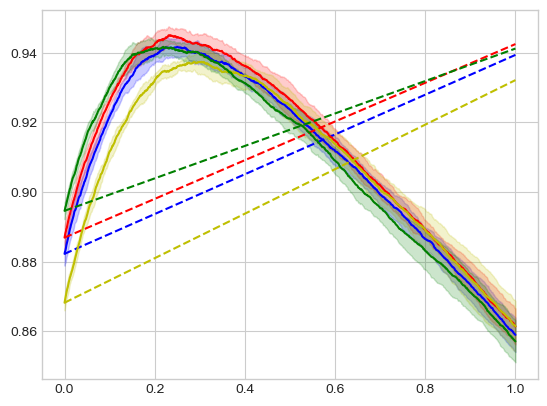

In [6]:
import random

k = 20
noise = 0.15

values = []

knee = [.278, .282, .307, .277]

for i in range(len(dfs_all)):
    
    for df in dfs_all[i]:
        df["rand_mod"] = [random.randint(0, k) if random.random() < noise else v for _, v in enumerate(df["y_hat"])]
    
    a, b = plot_moderation_performanceNoise(dfs_all[i], 'u_lc', names[i], colours[i], average='micro', eps=1000)
    values.append((a, b))
    
    x = a
    y = b.values
    
    print('Effort (%): ', knee[i])
    print('F1_Score  : ', y[int(knee[i]*1000)])
    print('- - - - - -')


In [5]:
1

1

In [3]:
plt.rc('font', size=17)
plt.rcParams["figure.figsize"] = (6,4)

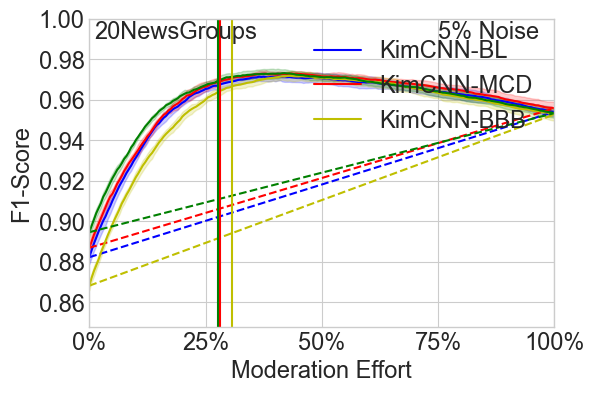

In [7]:
import random

k = 20
noise = 0.05

for i in range(len(dfs_all)):
    
    for df in dfs_all[i]:
        df["rand_mod"] = [random.randint(0, k) if random.random() < noise else v for _, v in enumerate(df["y_hat"])]
    
    plot_moderation_performanceNoise(dfs_all[i], 'u_lc', names[i], colours[i], average='micro')

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]
plt.legend([handles[idx] for idx in order],[label[idx] for idx in order] ,  loc='upper right')



plt.xticks([0, .25, .50, .75, 1], ['0%', '25%', '50%', '75%', '100%'])
plt.yticks([0.86, 0.88, .9, .92, .94, .96, .98, 1], ['0.86', '0.88', '0.90', '0.92', '0.94', '0.96', '0.98', '1.00'])

plt.xlim((0, 1))
plt.ylim((0.848, 1))

plt.xlabel('Moderation Effort')
plt.ylabel('F1-Score')
plt.text(0.01, .990, '20NewsGroups')
plt.text(0.75, .990, f'{int(noise*100)}% Noise')

plt.vlines(0.278, 0.848, 1, colors=colours[0],)
plt.vlines(0.282, 0.848, 1, colors=colours[1],)
plt.vlines(0.307, 0.848, 1, colors=colours[2],)
plt.vlines(0.277, 0.848, 1, colors=colours[3],)

plt.savefig(f'cnn2_20NewsGroups_y_noise_{int(noise*100)}.pdf', bbox_inches='tight')

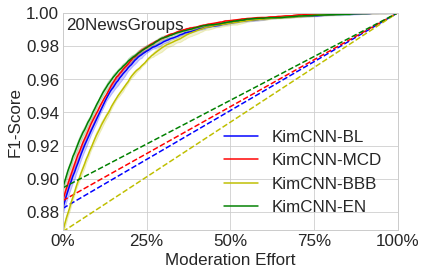

In [4]:
for i in range(len(dfs_all)):
    plot_moderation_performance(dfs_all[i], 'u_lc', names[i], colours[i], average='micro')

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3]
plt.legend([handles[idx] for idx in order],[label[idx] for idx in order])

plt.xlim((0, 1))
plt.ylim((0.869, 1))

plt.xticks([0, .25, .50, .75, 1], ['0%', '25%', '50%', '75%', '100%'])
plt.yticks([0.88, .9, .92, .94, .96, .98, 1], ['0.88', '0.90', '0.92', '0.94', '0.96', '0.98', '1.00'])

plt.xlabel('Moderation Effort')
plt.ylabel('F1-Score')
plt.text(0.01, .990, '20NewsGroups')

plt.savefig('cnn2_20n_y.pdf', bbox_inches='tight')

100%|██████████| 4/4 [00:00<00:00, 25.73it/s]



CNN2_BL
Effort (%):  0.278
F1_Score  :  0.9799555555555555

CNN2_MCD
Effort (%):  0.282
F1_Score  :  0.9832444444444445

CNN2_BBB
Effort (%):  0.307
F1_Score  :  0.9804444444444445

CNN2_EN
Effort (%):  0.277
F1_Score  :  0.9823999999999999


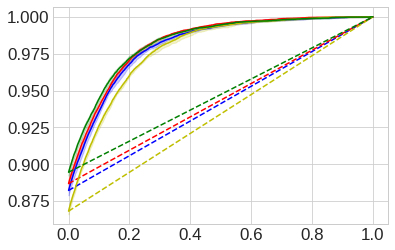

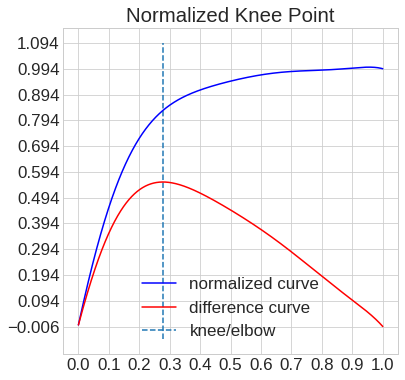

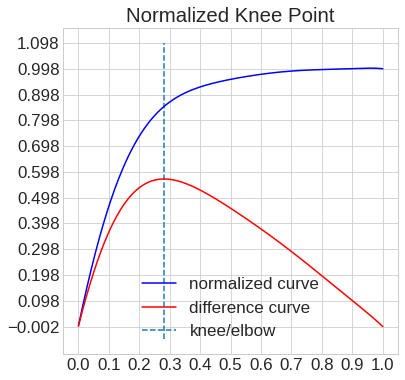

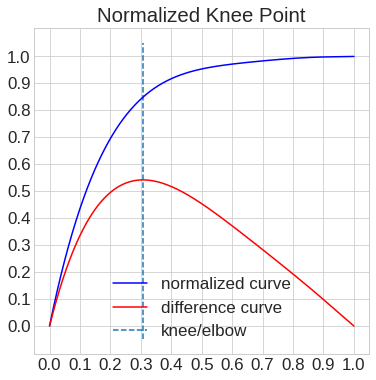

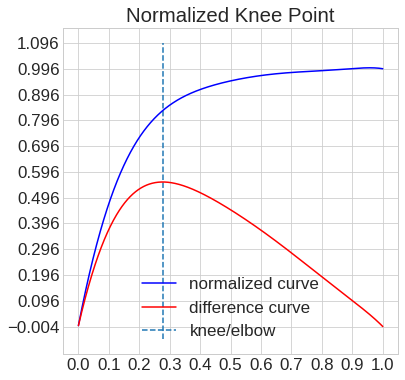

In [5]:
# Knee LC

values = []

for i in tqdm(range(len(dfs_all))):
    a, b = plot_moderation_performance(dfs_all[i], 'u_lc', names[i], colours[i], average='micro', eps=1000)
    values.append((a, b))

i = 0
for (a, b) in tqdm(values):
    x = a
    y = b.values
    kneedle = KneeLocator(x, y, S=1, curve='concave', direction='increasing', interp_method="polynomial")
    
    print('\n' + names[i])
    print('Effort (%): ', round(kneedle.knee, 3))
    print('F1_Score  : ', y[int(kneedle.knee*1000)])
    kneedle.plot_knee_normalized()
    i+= 1

C:\Users\Andersen\AppData\Local\Temp\ipykernel_24784\3853026.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
5it [00:03,  1.56it/s]


0.01:  71.7
0.05:  60.4
0.1:  53.3
0.15:  48.4
0.2:  42.8
0.5:  22.3


5it [00:03,  1.58it/s]


0.01:  69.6
0.05:  59.1
0.1:  52.4
0.15:  47.3
0.2:  41.8
0.5:  21.7


5it [00:03,  1.57it/s]


0.01:  77.4
0.05:  65.4
0.1:  57.8
0.15:  51.3
0.2:  46.0
0.5:  25.1


5it [00:03,  1.58it/s]


0.01:  67.4
0.05:  57.7
0.1:  49.7
0.15:  44.3
0.2:  38.5
0.5:  20.0


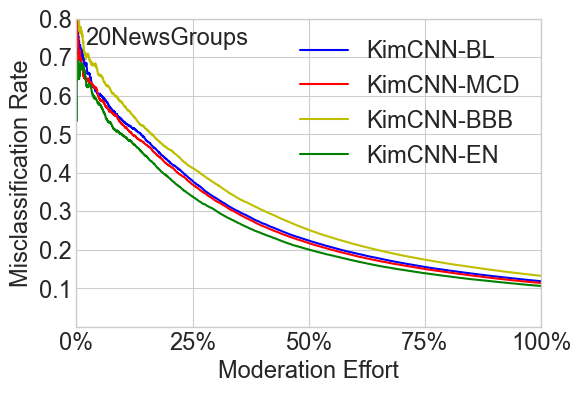

In [4]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=17)
plt.rcParams["figure.figsize"] = (6,4)

for idx, v in enumerate(names):
    
    data = []
    dfs = dfs_all[idx]
    
    mean = None
    mean_rng = None

    def ratio(array):
        true_counts = [sum(array[:i+1]) for i in range(len(array))]
        true_percentages = [(count / (i + 1)) * 100 for i, count in enumerate(true_counts)]
        data.append(true_percentages)
        mean = np.array(data).mean(axis=0)
        return mean

    for i, df in tqdm(enumerate(dfs)):
        boolean_array = df.sort_values('u_lc', ascending=False)['defect'].values
        mean = ratio(boolean_array)
        
        
    for i in [0.01, 0.05, 0.1, 0.15, 0.2, 0.5]:
        print(f"{i}: ", round(mean[int(len(df) * i)], 1))

    plt.plot(np.linspace(0, 100, len(dfs[0])), mean / 100, color=colours[idx], label=label[idx],)

    
# Diagramm anzeigen
plt.yticks([.10, .20, .30, .40, .50, .6, .7, .8]) 

# Achsenbeschriftungen und Legende hinzufügen
plt.xlabel('Moderation Effort')
plt.ylabel('Misclassification Rate')
plt.legend()
plt.xlim(0, 100)
plt.xticks([0, 25, 50, 75, 100], ['0%', '25%', '50%', '75%', '100%'])
plt.ylim(0, 0.8)
plt.text(2, .732, '20NewsGroups')
plt.savefig('ccn2_20ng_eff.pdf', bbox_inches='tight')

plt.show()